In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [101]:
df_train=pd.read_csv("C:\\Users\\admin\\Desktop\\trainiris.csv")
df_labels=pd.read_csv("C:\\Users\\admin\\Desktop\\trainirisLabels.csv")
df_test=pd.read_csv("C:\\Users\\admin\\Desktop\\testIris.csv")

In [102]:
df_train=pd.merge(df_train,df_labels,on='Id')

In [103]:
df_train

,Id,feat1,feat2,feat3,feat4,label1
0,1,6.39160,3.259600,4.08290,1.462300,1
1,2,1.96970,4.153300,2.07680,-0.636100,1
2,3,5.47050,0.098712,-0.28554,0.372070,1
3,4,6.83660,0.695090,4.37090,0.012804,1
4,5,4.98990,4.191500,-1.88480,0.638590,1
...,...,...,...,...,...,...
115,116,5.72800,2.185400,4.78980,2.856000,3
116,117,7.99160,2.930700,4.92550,0.763500,3
117,118,5.73280,3.613200,6.43350,2.002200,3
118,119,0.77898,2.513100,2.07870,3.152600,3


In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      120 non-null    int64  
 1   feat1   120 non-null    float64
 2   feat2   120 non-null    float64
 3   feat3   120 non-null    float64
 4   feat4   120 non-null    float64
 5   label1  120 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 6.6 KB


In [105]:
 import seaborn as sns

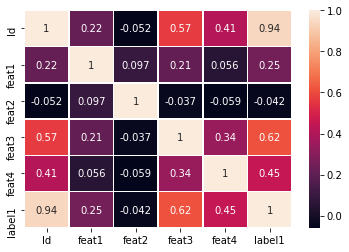

In [106]:
sns.heatmap(df_train.corr(),annot=True,linewidth=0.5)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


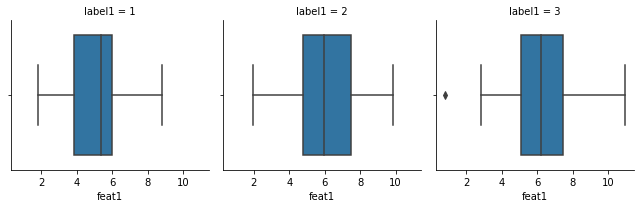

In [107]:
g=sns.FacetGrid(df_train,col='label1')
g.map(sns.boxplot,'feat1')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


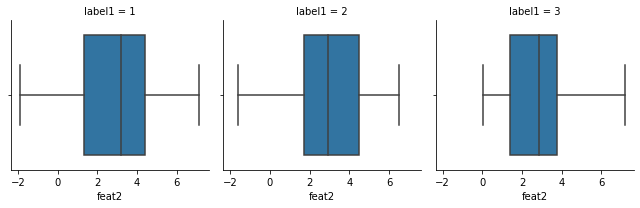

In [108]:
g=sns.FacetGrid(df_train,col='label1')
g.map(sns.boxplot,'feat2')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


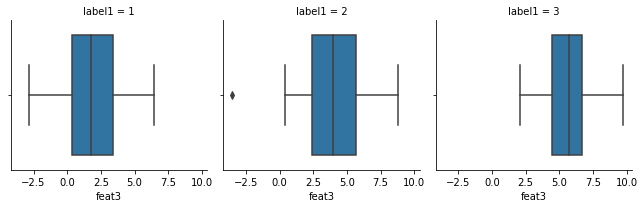

In [109]:
g=sns.FacetGrid(df_train,col='label1')
g.map(sns.boxplot,'feat3')

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


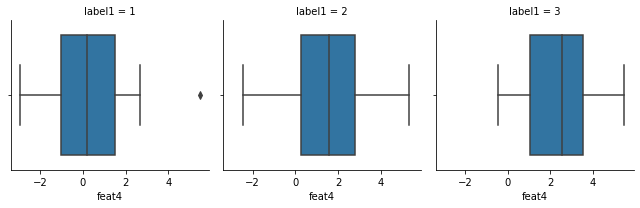

In [110]:
g=sns.FacetGrid(df_train,col='label1')
g.map(sns.boxplot,'feat4')

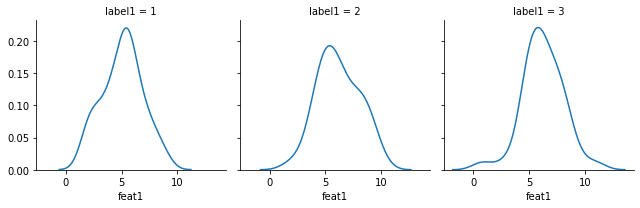

In [111]:
g=sns.FacetGrid(df_train,col='label1')
g.map(sns.kdeplot,'feat1')

In [112]:
df_train=df_train.drop(columns=['Id'])

In [113]:
y=df_train.iloc[:,-1].values
x=df_train.iloc[:,:-1].values

In [114]:
model=LogisticRegression()
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
df_test.head()

,Id,feat1,feat2,feat3,feat4
0,1,6.9,3.1,5.1,2.3
1,2,4.8,3.0,1.4,0.3
2,3,4.4,3.2,1.3,0.2
3,4,5.7,3.0,4.2,1.2
4,5,5.5,2.6,4.4,1.2


In [116]:
x_test=df_test.drop(columns=['Id']).values

In [117]:
y_pred=model.predict(x_test)

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [119]:
model.score(x,y)

0.6083333333333333

In [120]:
y_pred

array([3, 1, 1, 2, 2, 3, 1, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 1,
       1, 2, 3, 2, 1, 2, 1, 2], dtype=int64)

In [123]:
cols = np.full((df_train.corr().shape[0]), True, dtype=bool)

for i in range(0,df_train.corr().shape[0]):
    for j in range(i+1,df_train.corr().shape[0]):
        if df_train.corr().iloc[i][j]>=0.9:
            if cols[j]:
                cols[j]=false;

In [124]:
sel_cols=df_train.columns[cols]
sel_cols

Index(['feat1', 'feat2', 'feat3', 'feat4', 'label1'], dtype='object')

In [125]:
import statsmodels.api as sm

In [126]:
p_cols=sel_cols[:-1]
def backward_elim(x,y,sl,cols):
    numvars=len(x[0])
    for i in range(0,numvars):
        reg_ols=sm.OLS(y,x).fit()
        maxvar=max(reg_ols.pvalues).astype(float)
        if maxvar>sl:
            for j in range(0,numvars-i):
                if reg_ols.pvalues[j].astype(float)==maxvar:
                    x=np.delete(x,j,1)
                    cols=np.delete(cols,j)
    reg_ols.summary()
    return x, cols
SL = 0.05
data_modeled, selected_columns = backward_elim(df_train.drop(columns=['label1']).values,y, SL, p_cols)  

In [127]:
selected_columns

Index(['feat1', 'feat3', 'feat4'], dtype='object')

In [128]:
data=pd.DataFrame(data=data_modeled,columns=selected_columns)

In [129]:
final_xtrain=data.values

In [130]:
model_f=LogisticRegression()
model_f.fit(final_xtrain,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
final_xtest=df_test[selected_columns]

In [133]:
final_ypred=model_f.predict(final_xtest.values)

In [134]:
final_ypred

array([3, 1, 1, 2, 2, 3, 1, 3, 2, 2, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 3, 1,
       1, 2, 3, 2, 1, 2, 1, 2], dtype=int64)

In [137]:
model_f.score(final_xtrain,y)

0.5833333333333334

In [142]:
submission = pd.DataFrame({
        "Id": df_test["Id"],
        "label1": y_pred
    })
submission.to_csv('submission_2.csv', index=False)